# Oasis Infobyte Internship Task 3 - Sales Prediction Using Python

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [48]:
data = pd.read_csv(R"C:\Users\91779\Downloads\archive (5)\Advertising.csv")
data.shape

(200, 5)

In [49]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [50]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


The dataset consists of advertising budgets for TV, radio and newspaper for determining the sales of a product.

Role of Data Scientist is to find:

A function for sales prediction of a product wrt advertising budget and visualize the relationship between features and response. Also determine which media contribute to sales.

In [51]:
# summary of all numeric columns
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


EDA - Exploratory Data Analysis

In [53]:
data.shape

(200, 4)

In [54]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


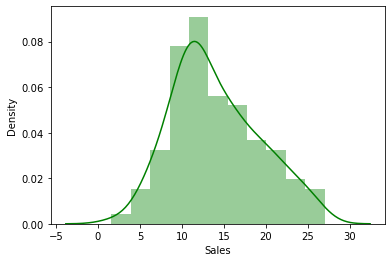

In [55]:
sns.distplot(data.Sales, color='green')
plt.show()

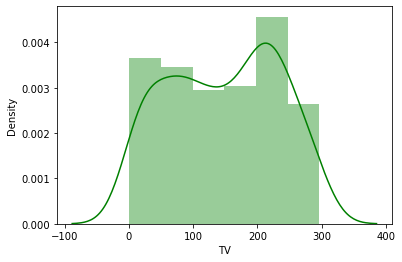

In [56]:
sns.distplot(data.TV, color='green')
plt.show()

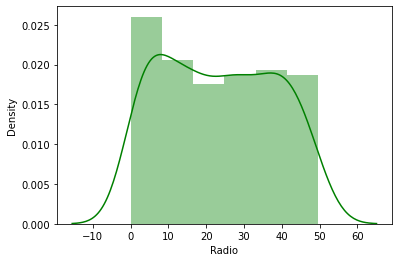

In [57]:
sns.distplot(data.Radio, color='green')
plt.show()

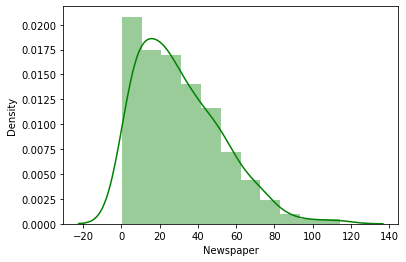

In [58]:
sns.distplot(data.Newspaper, color='green')
plt.show()

In [59]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


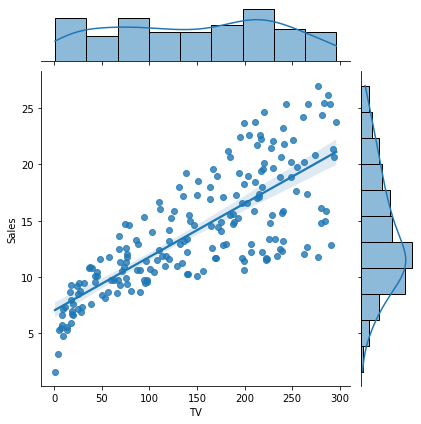

In [60]:
sns.jointplot('TV', 'Sales', data=data, kind='reg')
plt.show()

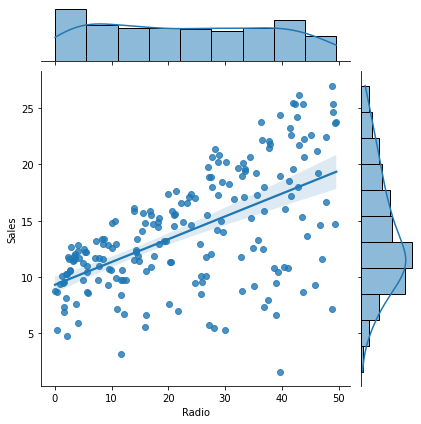

In [61]:
sns.jointplot('Radio', 'Sales', data=data, kind='reg')
plt.show()

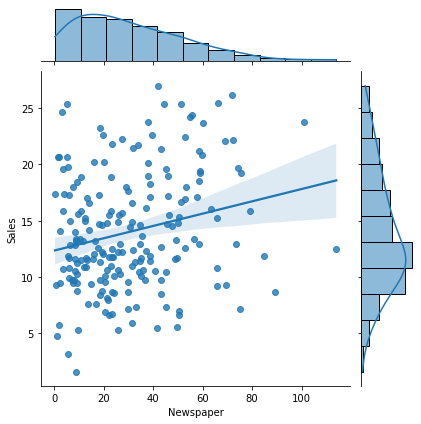

In [62]:
sns.jointplot('Newspaper', 'Sales', data=data, kind='reg')
plt.show()

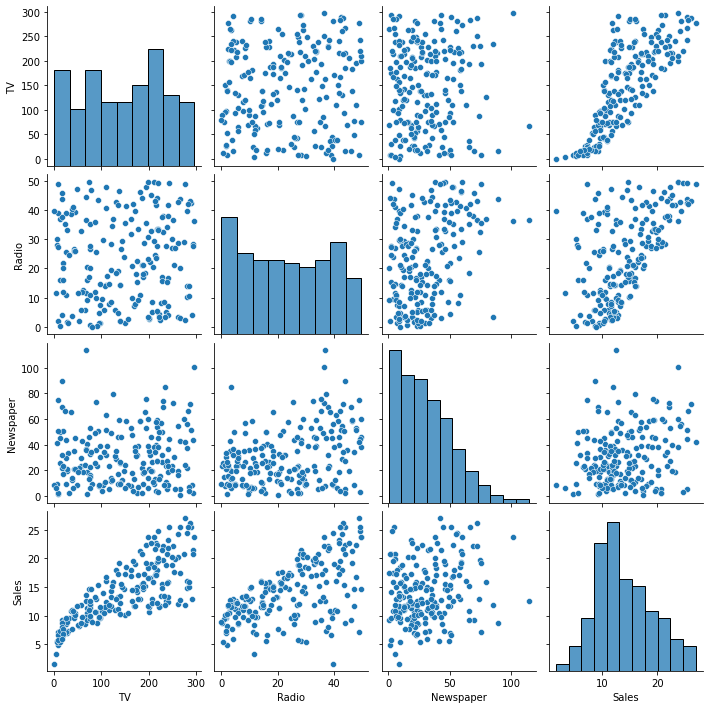

In [63]:
sns.pairplot(data)
plt.show()

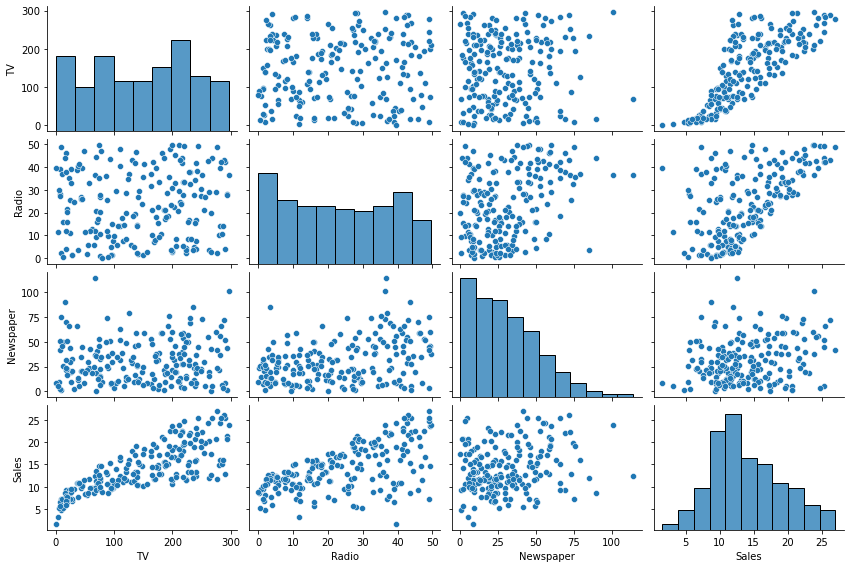

In [64]:
sns.pairplot(data, size=2, aspect=1.5)
plt.show()

In [65]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


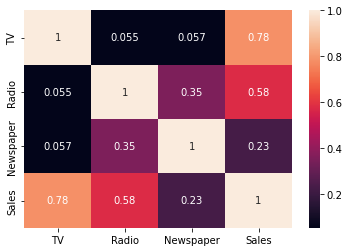

In [66]:
sns.heatmap(data.corr(), annot=True)
plt.show()

In [67]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [68]:
data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [69]:
features = ['TV', 'Radio', 'Newspaper']
features

['TV', 'Radio', 'Newspaper']

In [70]:
X = data[features]
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [71]:
X.shape

(200, 3)

In [72]:
y = data.Sales
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [73]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [74]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((160, 3), (40, 3), (160,), (40,))

In [75]:
X_train.head()

,TV,Radio,Newspaper
134,36.9,38.6,65.6
66,31.5,24.6,2.2
26,142.9,29.3,12.6
113,209.6,20.6,10.7
168,215.4,23.6,57.6


In [76]:
X_train.describe()

,TV,Radio,Newspaper
count,160.000000,160.000000,160.000000
mean,150.518125,23.388125,30.125625
std,84.957371,14.736240,21.444814
min,4.100000,0.000000,0.900000
25%,76.375000,9.525000,11.675000
50%,157.400000,24.300000,25.900000
75%,220.350000,36.350000,45.100000
max,296.400000,49.600000,100.900000


In [77]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train[features] = mms.fit_transform(X_train[features]) # fit means study and transform means give exam
X_test[features] = mms.transform(X_test[features])

In [78]:
X_train.head()

,TV,Radio,Newspaper
134,0.112213,0.778226,0.647
66,0.093739,0.495968,0.013
26,0.474855,0.590726,0.117
113,0.703045,0.415323,0.098
168,0.722887,0.475806,0.567


In [79]:
X_train.describe()

,TV,Radio,Newspaper
count,160.000000,160.000000,160.000000
mean,0.500917,0.471535,0.292256
std,0.290651,0.297102,0.214448
min,0.000000,0.000000,0.000000
25%,0.247263,0.192036,0.107750
50%,0.524461,0.489919,0.250000
75%,0.739822,0.732863,0.442000
max,1.000000,1.000000,1.000000


In [80]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train) 

LinearRegression()

In [81]:
lr

LinearRegression()

In [82]:
y_pred_train = lr.predict(X_train)

y_pred_test = lr.predict(X_test)

In [83]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [84]:
# Train r2 score
r2_score(y_train, y_pred_train)

0.9067114990146383

In [85]:
# Test r2 score
r2_score(y_test, y_pred_test)

0.8601145185017869

In [86]:
mean_absolute_error(y_train, y_pred_train)

1.2131871622729429

In [87]:
mean_absolute_error(y_test, y_pred_test)

1.3617813502090281

In [88]:
mean_squared_error(y_train, y_pred_train)

2.406814755818906

In [89]:
mean_squared_error(y_test, y_pred_test)

4.402118291449683

In [90]:
np.sqrt(mean_squared_error(y_train, y_pred_train))

1.5513912323520802

In [91]:
np.sqrt(mean_squared_error(y_test, y_pred_test))

2.09812256349568